In [1]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#path to project 
path = r'/Users/elenasharavara/Documents/02 Data /Prepared data'

In [4]:
#import data as dataframe 
df = pd.read_pickle(os.path.join(path,'movie_dataset.pkl'))

In [5]:
#check the df 
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [6]:
sub = df[['id', 'number_of_episodes', 'vote_count', 'vote_average', 'episode_run_time','popularity']]

In [7]:
#check the df 
sub.head()

,id,number_of_episodes,vote_count,vote_average,episode_run_time,popularity
0,1399,73,21857,8.442,0,1083.917
1,71446,41,17836,8.257,70,96.354
2,66732,34,16161,8.624,0,185.711
3,1402,177,15432,8.121,42,489.746
4,63174,93,13870,8.486,45,416.668


In [8]:
#check the columns 
sub.columns.to_list()

['id',
 'number_of_episodes',
 'vote_count',
 'vote_average',
 'episode_run_time',
 'popularity']

In [9]:
#check for missing values 
sub.isnull().sum()


id                    0
number_of_episodes    0
vote_count            0
vote_average          0
episode_run_time      0
popularity            0
dtype: int64

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

In [16]:
#list score
score

[-814023358115515.2,
 -219053101343407.8,
 -65379926307725.84,
 -33501930583391.453,
 -21561342662270.34,
 -16090714977927.875,
 -12350805501896.922,
 -9048522909661.855,
 -6698567935558.666]

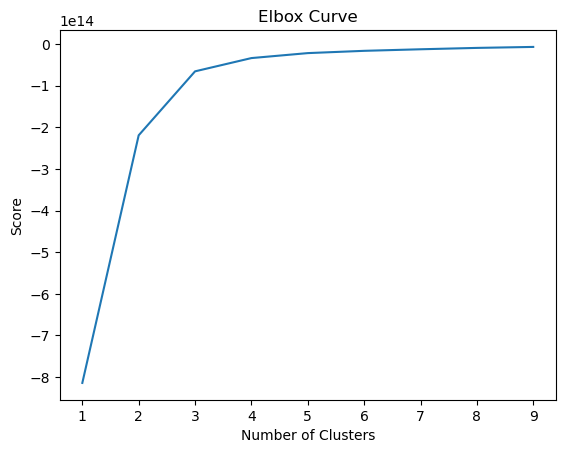

In [17]:
#plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

In [18]:
#create the k-means object
kmeans = KMeans(n_clusters = 3)

In [19]:
#fit kmeans object to dataframe 
kmeans.fit(sub)

/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
#create column in dataframe with values corresponding to clusters 
sub['clusters'] = kmeans.fit_predict(sub)

/Users/elenasharavara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_51325/888961003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [21]:
#check the dataframe to see the new column 
sub.head()

,id,number_of_episodes,vote_count,vote_average,episode_run_time,popularity,clusters
0,1399,73,21857,8.442,0,1083.917,2
1,71446,41,17836,8.257,70,96.354,2
2,66732,34,16161,8.624,0,185.711,2
3,1402,177,15432,8.121,42,489.746,2
4,63174,93,13870,8.486,45,416.668,2


In [22]:
#count the clusers 
sub['clusters'].value_counts()

2    64677
0    59683
1    34650
Name: clusters, dtype: int64

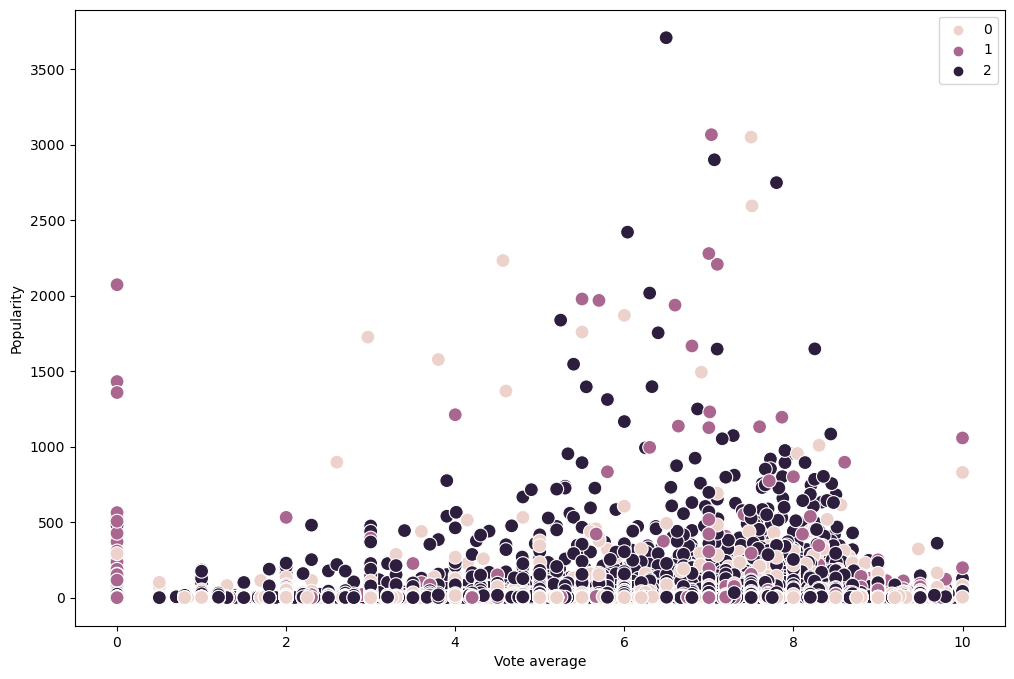

In [23]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['vote_average'], y=df['popularity'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Vote average') # Label x-axis.
plt.ylabel('Popularity') # Label y-axis.
plt.show()

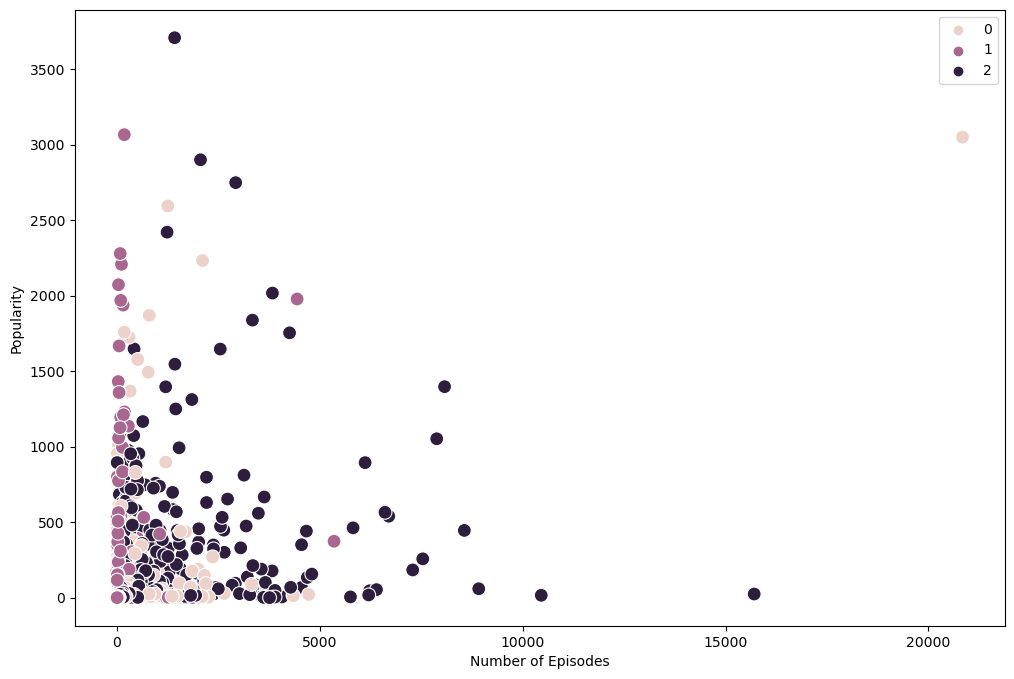

In [24]:
#plot population vs cases 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_episodes'], y=df['popularity'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Episodes') # Label x-axis.
plt.ylabel('Popularity') # Label y-axis.
plt.show()

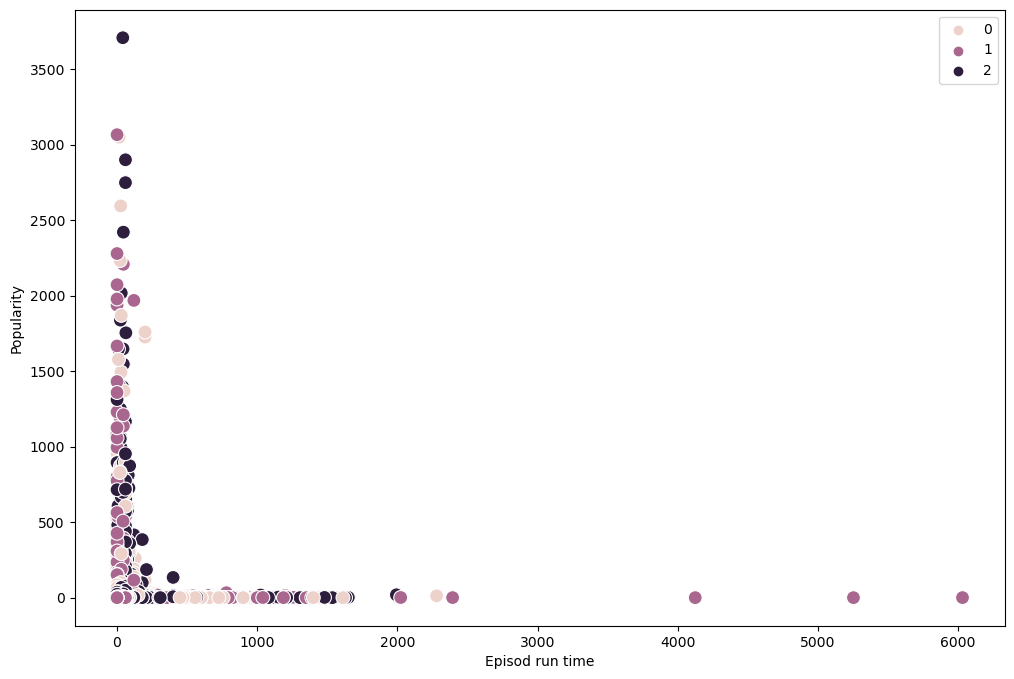

In [25]:
#plot population vs deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['episode_run_time'], y=df['popularity'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Episod run time') # Label x-axis.
plt.ylabel('Popularity') # Label y-axis.
plt.show()


#Based on these statistics, black (3) and purple (1) clusters have the best stats in almost all categories, the highest films popularity and vote everage. The dark purple and pink clusters exhibits mostly larger differences, indicating  more variability within those clusters for some indicators.

In [26]:
#create a column that renames the clusters to colors 
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'

/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_51325/3083701689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'


In [27]:
sub.groupby('clusters').agg({'popularity':['mean', 'median'], 
                         'vote_count':['mean', 'median'], 
                         'vote_average':['mean', 'median']})

popularity        vote_count        vote_average       
               mean median       mean median         mean median
clusters                                                        
0          4.268096  1.090  12.431798    0.0     2.811428    0.0
1          3.690077  0.635   1.161934    0.0     1.494958    0.0
2          8.610426  0.840  22.582897    0.0     2.612602    0.0

#Based on these statistics, black (3) and purple (1) clusters have the best stats in almost all categories, the highest films popularity and vote everage. The dark purple clusters exhibits mostly larger differences, indicating  more variability within those clusters for some indicators.
In this instance, only the black cluster is visually separated from the rest. The other clusters are jumbled all together.

However, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

Not only that, but they are ‘orthogonal’ to each other. This means that the difference between components is as big as possible.

There is some overlap between  segments. But, as a whole, all three segments are clearly separated. The spots where the two overlap are ultimately determined by the third component.

#### What could these results be useful for?

The Internet Movie Database (IMDb) is one of the most-visited websites in the world and the premier source for information on films. Similar to Wikipedia, much of IMDb's information is user contributed. IMDb also allows users to voice their opinion on the quality of films through voting. We investigate whether there is a connection between user voting data and economic film characteristics.
The findings can help better understand the characteristics of each cluster. Popularity is a fairly important metric here on TMDB. It helps us boost search results, adds an incredibly useful sort value for discover, and is also just kind of fun to see items chart up and down. You can think of popularity as being a "lifetime" popularity score that is impacted by the attributes below. It's calculated quite differently than trending.
